In [1]:
#import libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.preprocessing.image import ImageDataGenerator
import os

#constants
img_rows, img_cols = 32, 32
batch_size = 16
num_classes = 20

#directory for train/test data
train_data_dir = 'simpsonsdata/simpsons/train'
validation_data_dir = 'simpsonsdata/simpsons/validation'

#augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   fill_mode='nearest',
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

#create generator
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_rows, img_cols),
                                                    class_mode='categorical',
                                                    batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                    target_size=(img_rows, img_cols),
                                                    class_mode='categorical',
                                                    batch_size=batch_size)

Using TensorFlow backend.


Found 19551 images belonging to 20 classes.
Found 990 images belonging to 20 classes.


In [2]:
#create model
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)       

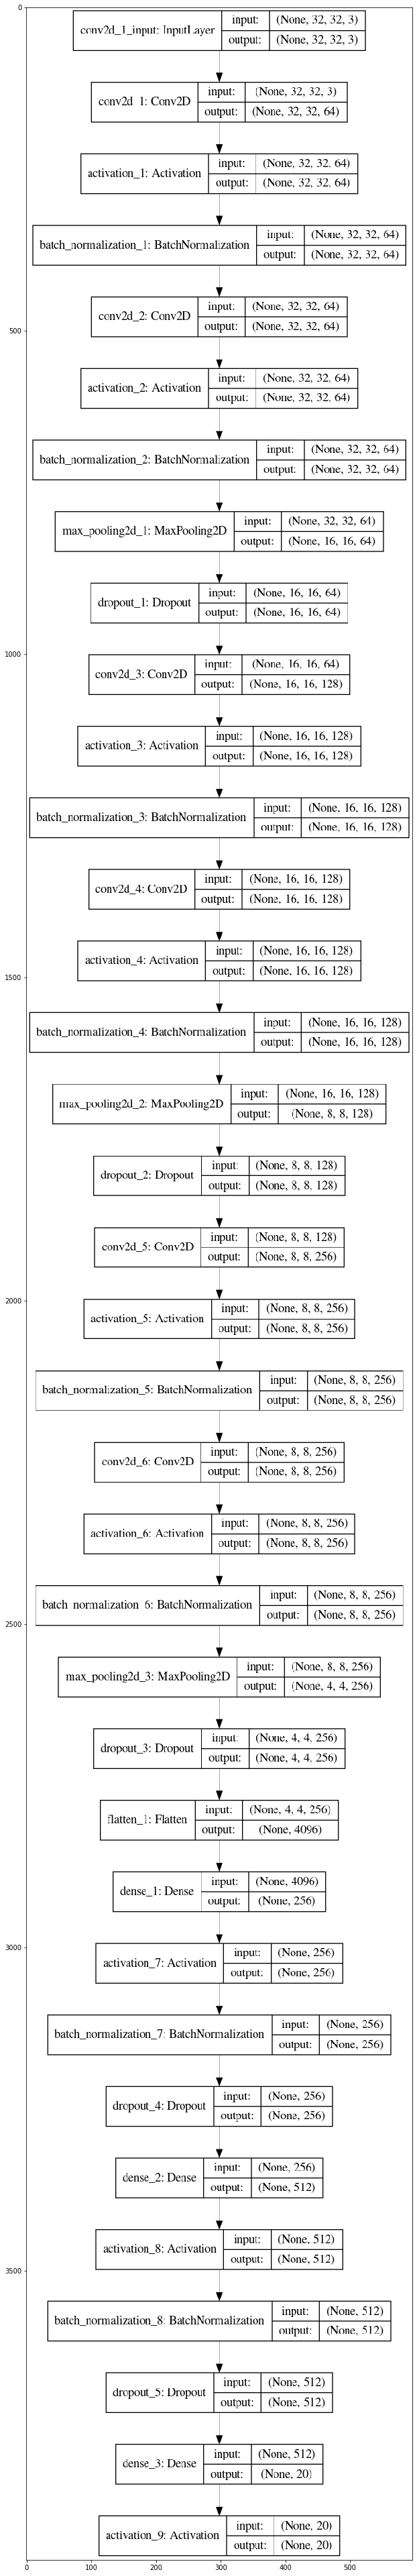

In [3]:
#print layers into image
%matplotlib inline
import keras
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plot_model(model, to_file='LittleVGG.png', show_shapes=True, show_layer_names=True)
img = mpimg.imread('LittleVGG.png')
plt.figure(figsize=(100,70))
imgplot = plt.imshow(img) 

In [4]:
#training model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

nb_train_samples = 19551
nb_validation_samples = 990
epochs = 10

checkpoint = ModelCheckpoint('simpsons_vgg16.h5',
                            monitor='val_loss',
                            mode='min',
                            save_best_only=True,
                            verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                         min_delta=0,
                         patience=3,
                         verbose=1,
                         restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                             factor=0.2,
                             patience=3,
                             verbose=1,
                             min_delta=0.00001)

callbacks = [earlystop, checkpoint, reduce_lr]

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.01),
             metrics=['accuracy'])

history = model.fit_generator(train_generator, 
                              steps_per_epoch=nb_train_samples//batch_size,
                              epochs=epochs,
                              verbose=1,
                              callbacks=callbacks,
                              validation_data=validation_generator,
                              validation_steps=nb_validation_samples//batch_size)

Epoch 1/10
1221/1221 [==============================] - 497s 407ms/step - loss: 3.0750 - accuracy: 0.1580 - val_loss: 2.6913 - val_accuracy: 0.2264

Epoch 00001: val_loss improved from inf to 2.69133, saving model to simpsons_vgg16.h5
Epoch 2/10
1221/1221 [==============================] - 388s 318ms/step - loss: 2.4227 - accuracy: 0.2613 - val_loss: 3.2794 - val_accuracy: 0.2690

Epoch 00002: val_loss did not improve from 2.69133
Epoch 3/10
1221/1221 [==============================] - 390s 320ms/step - loss: 2.0729 - accuracy: 0.3813 - val_loss: 3.2118 - val_accuracy: 0.1663

Epoch 00003: val_loss did not improve from 2.69133
Epoch 4/10
1221/1221 [==============================] - 353s 289ms/step - loss: 1.8897 - accuracy: 0.4448 - val_loss: 1.9723 - val_accuracy: 0.4754

Epoch 00004: val_loss improved from 2.69133 to 1.97229, saving model to simpsons_vgg16.h5
Epoch 5/10
1221/1221 [==============================] - 351s 288ms/step - loss: 1.6342 - accuracy: 0.5202 - val_loss: 2.2347 -

Found 990 images belonging to 20 classes.
Confusion Matrix
                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.84      0.75      0.79        48
  apu_nahasapeemapetilon       0.96      0.92      0.94        50
            bart_simpson       0.65      0.66      0.65        50
charles_montgomery_burns       0.49      0.77      0.60        48
            chief_wiggum       0.74      0.96      0.83        50
          comic_book_guy       0.89      0.51      0.65        49
          edna_krabappel       0.85      0.46      0.60        50
           homer_simpson       0.58      0.84      0.69        50
           kent_brockman       1.00      0.52      0.68        50
        krusty_the_clown       0.92      0.96      0.94        50
           lenny_leonard       0.91      0.58      0.71        50
            lisa_simpson       0.47      0.52      0.50        50
           marge_simpson       0.93      0.80      0.86        50
            mayo

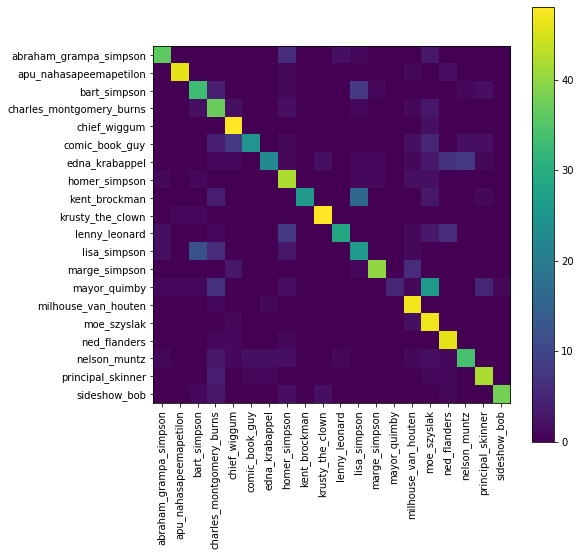

In [5]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v:k for k, v in class_labels.items()}
classes = list(class_labels.values())

Y_pred = model.predict_generator(validation_generator, nb_validation_samples//batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(classification_report(validation_generator.classes, y_pred, target_names=classes))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [6]:
from keras.models import load_model

classifier = load_model('simpsons_vgg16.h5')

In [8]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)
    

def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 32, 32

files = []
predictions = []
true_labels = []

# predicting images
for i in range(0, 10):
    path = 'simpsonsdata/simpsons/validation/' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = classifier.predict_classes(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    image = cv2.resize(image, None, fx=5, fy=5, interpolation = cv2.INTER_CUBIC)
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()